In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pdb
%matplotlib inline

from JSAnimation.IPython_display import display_animation
from matplotlib import animation
from IPython import display

gym.logger.set_level(40)
np.set_printoptions(precision=2)

In [2]:
def display_frames_as_gif(frames):
    """
    Displays a list of frames as a gif, with controls
    """
    patch = plt.imshow(frames[0])
    plt.axis('off')
    
    def animate(i):
        patch.set_data(frames[i])
        
    anim = animation.FuncAnimation(plt.gcf(), animate, frames=len(frames), interval=50)
    display.display(display_animation(anim, default_mode='loop'))

The state has four components: position, velocity, angle, angular_velocity.
x, x_prime, theta, theta_prime

Our Q-table will be a partition into two buckets of each of these, negative and positive.
So Q-table will have dimensions (2, 2, 2, 2, 2). The last dimension reflects the value of moving left/right.

In [3]:
Q_table = np.zeros((3, 3, 6, 3, 2))

def reset_Q():
    Q_table[:,:,:,:,:] = 0

def partition(state):
    """
    Parameters:
        state ((4,) ndarray, dtype float): position, velocity, angle, angular velocity.
    Returns:
        discrete_state (tuple(int,int,int,int)): discretized into buckets.
    """
    dstate = np.zeros(state.shape)
    # position
    if state[0] < -0.8:
        dstate[0] = 0
    elif state[0] < 0.8:
        dstate[0] = 1
    else:
        dstate[0] = 2
        
    # velocity
    if state[1] < -0.5:
        dstate[1] = 0
    elif state[1] < 0.5:
        dstate[1] = 1
    else:
        dstate[1] = 2
    
    # angle:
    if state[2] < -6:
        dstate[2] = 0
    elif state[2] < -1:
        dstate[2] = 1
    elif state[2] < 0:
        dstate[2] = 2
    elif state[2] < 1:
        dstate[2] = 3
    elif state[2] < 6:
        dstate[2] = 4
    else:
        dstate[2] = 5
        
    # angular velocity:
    if state[3] < -50:
        dstate[3] = 0
    elif -state[3] < 50:
        dstate[3] = 1
    else:
        dstate[3] = 2
        
    return tuple(dstate.astype(int))
        
def choose_move(state, epsilon):
    """
    Epsilon-greedy strategy. epsilon percent of the time, we move randomly.
    """
    if np.random.random() < epsilon:
        return np.random.randint(Q_table.shape[-1])
    
    dstate = partition(state)
    return np.argmax(Q_table[dstate])

def update(state, action, reward, state_prime, alpha, gamma):
    dstate, dstate_prime = partition(state), partition(state_prime)
    Q = Q_table[dstate][action]
    Q_prime = np.max(Q_table[dstate_prime])
    Q_table[dstate][action] = Q + alpha*(reward + gamma*Q_prime - Q)

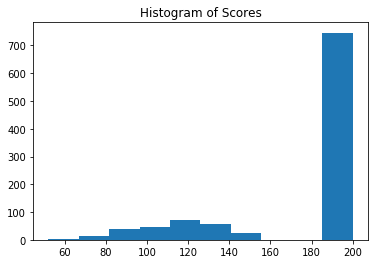

In [23]:
alpha = 0.1
gamma = 0.9

env = gym.make('CartPole-v0')
rewards = []
frames = []
# reset_Q()
for i in range(1000):
    observation = env.reset()
    cum_reward = 0
    for i in range(500):
        # frames.append(env.render(mode='rgb_array'))
        action = choose_move(observation, epsilon=0.0)
        new_observation, reward, done, info = env.step(action)
        if done and i < 199:
            reward = -50
        update(state=observation, action=action, reward=reward, state_prime=new_observation, alpha=alpha, gamma=gamma)
        observation = new_observation
        cum_reward += reward
        if done:
            break
    rewards.append(cum_reward)
        
env.close()



plt.hist(rewards)
plt.title("Histogram of Scores")
plt.show()
    
# display_frames_as_gif(frames)
rewards = np.array(rewards)

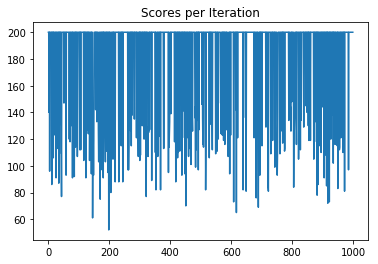

In [29]:
plt.plot(rewards)
plt.title("Scores per Iteration")
plt.show()

In [22]:
np.mean(rewards)

174.897

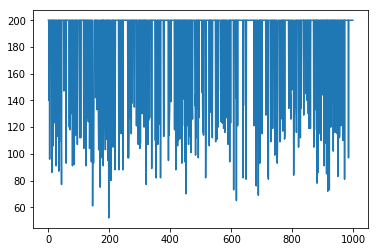

In [28]:
plt.plot(rewards)
plt.show()

In [14]:
np.max(Q_table, axis=4)

array([[[[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 9.61, 0.  ],
         [0.  , 9.63, 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 9.72, 0.  ],
         [0.  , 9.23, 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  ],
         [0.  , 9.7 , 0.  ],
         [0.  , 9.73, 0.  ],
  

In [8]:
Q_table

array([[[[[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]]],


        [[[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

         [[0., 0.],
          [0., 0.],
          [0., 0.]],

    